In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as im
import pickle
from project import gradients, region_of_interest, get_points, Camera
from thresholding import *
from moviepy.editor import VideoFileClip
%matplotlib inline


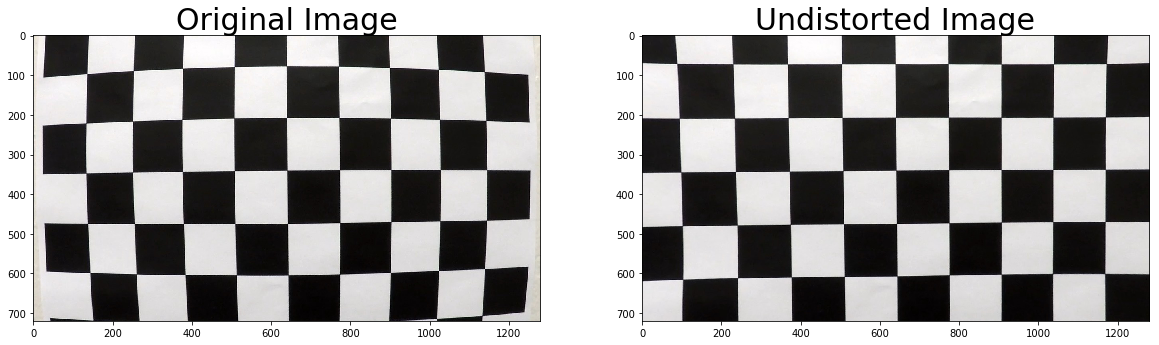

In [2]:
camera = Camera()

camera.calibrate("./camera_cal/*.jpg")

# Read test image
image = im.imread("camera_cal/calibration1.jpg")
dst   = camera.undistort(image)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

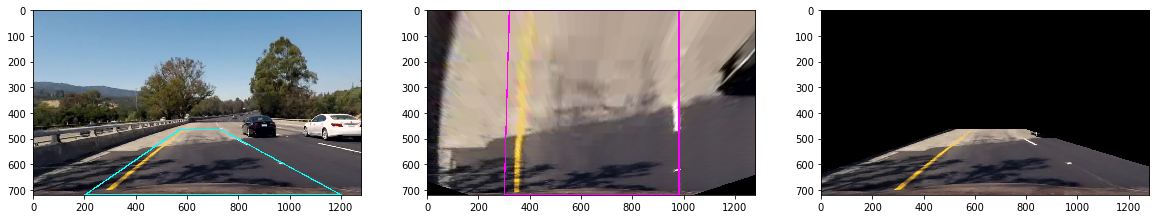

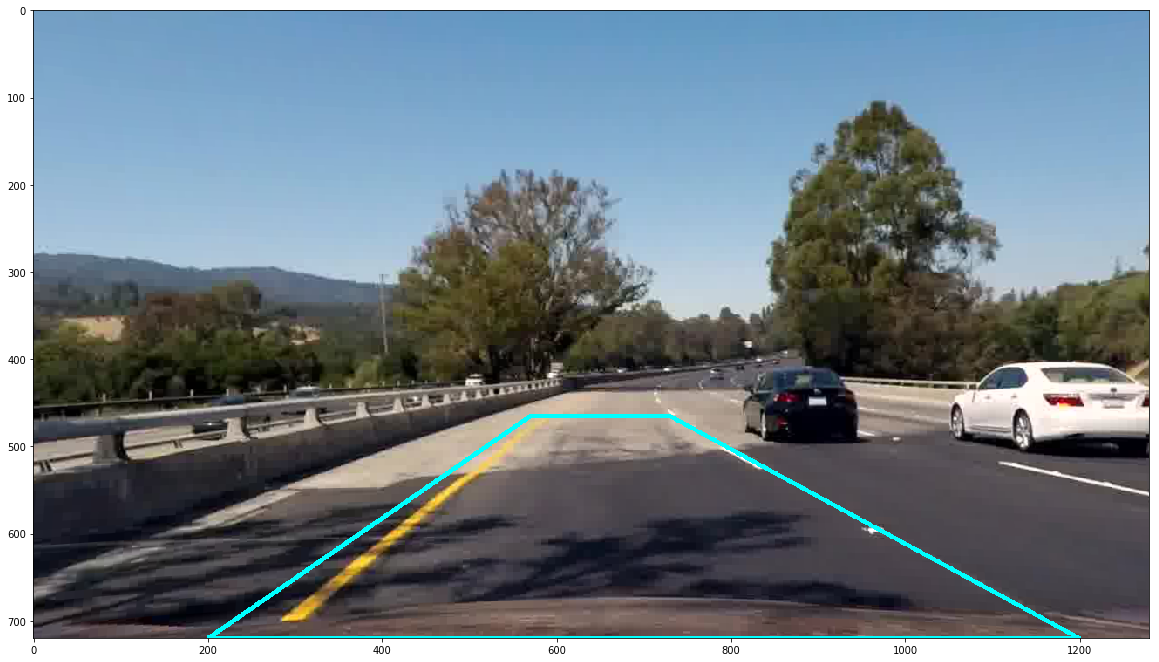

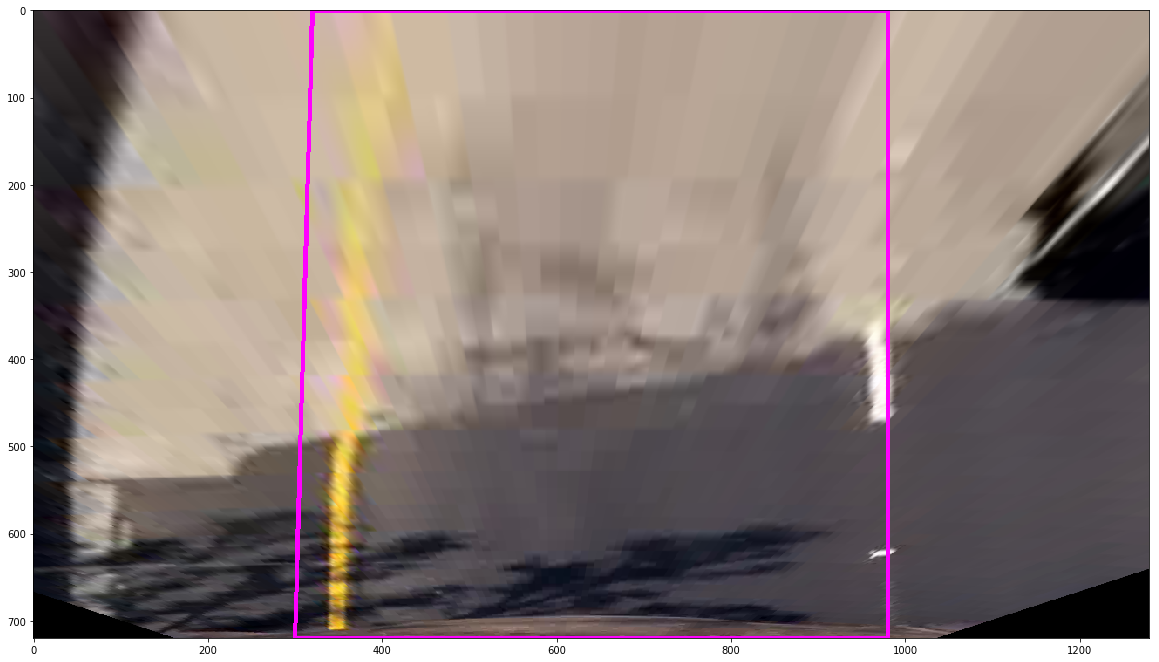

In [110]:
frame_id          = 991
image             = plt.imread("./frames/frame-{0:04d}.jpg".format(frame_id))
#image = plt.imread("test_images/straight_lines2.jpg")
img = camera.undistort(image) #np.copy(image)
copy = img.copy()
xLen = img.shape[1]
yLen = img.shape[0]
ht = 480

#src = np.float32([[(208, 720), (558, 474), (757, 474),(1200, 720)]])
#src = np.float32([[(208, 720), (538, 490), (764, 490),(1200, 720)]])
#dst = np.float32([[(320, 720), (320, 0), (980, 0), (980, 720)]])

src = np.float32([[(200, 720), (570, 465), (730, 465), (1200, 720)]])

#src = np.float32([[(200, 720), (570, 470), (740, 470), (1200, 720)]])
dst = np.float32([[(300, 720), (320, 0), (980, 0), (980, 720)]])


lines = cv2.polylines(copy, np.int32([src]), True, (0, 255, 255), 3)
#lines = cv2.polylines(lines, np.int32([dst]), True, (255, 0, 255), 3)

M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)
image_size = (image.shape[1], image.shape[0])
warped = cv2.warpPerspective(img, M, image_size, cv2.INTER_LINEAR)
restore_img = cv2.warpPerspective(warped, Minv, image_size, cv2.INTER_LINEAR)



warped = cv2.polylines(warped, np.int32([dst]), True, (255, 0, 255), 3)

restore_lines = cv2.warpPerspective(warped, Minv, image_size, cv2.INTER_LINEAR)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.imshow(lines)
ax2.imshow(warped)
ax3.imshow(restore_img)
plt.figure(figsize=(20,20))
plt.imshow(lines)
plt.figure(figsize=(20,20))
plt.imshow(warped)

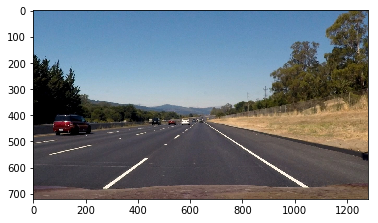

In [108]:
plt.figure()
plt.imshow(image)

(array([ 60.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  40.]),
 array([ 144. ,  144.1,  144.2,  144.3,  144.4,  144.5,  144.6,  144.7,
         144.8,  144.9,  145. ]),
 <a list of 10 Patch objects>)

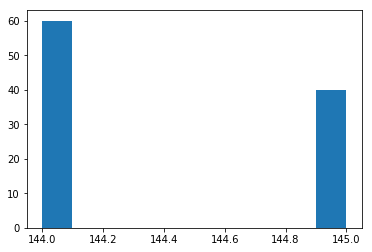

In [51]:
luv  = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
l,u,v= cv2.split(luv)
plt.hist(l[0:10,700:710].flatten())

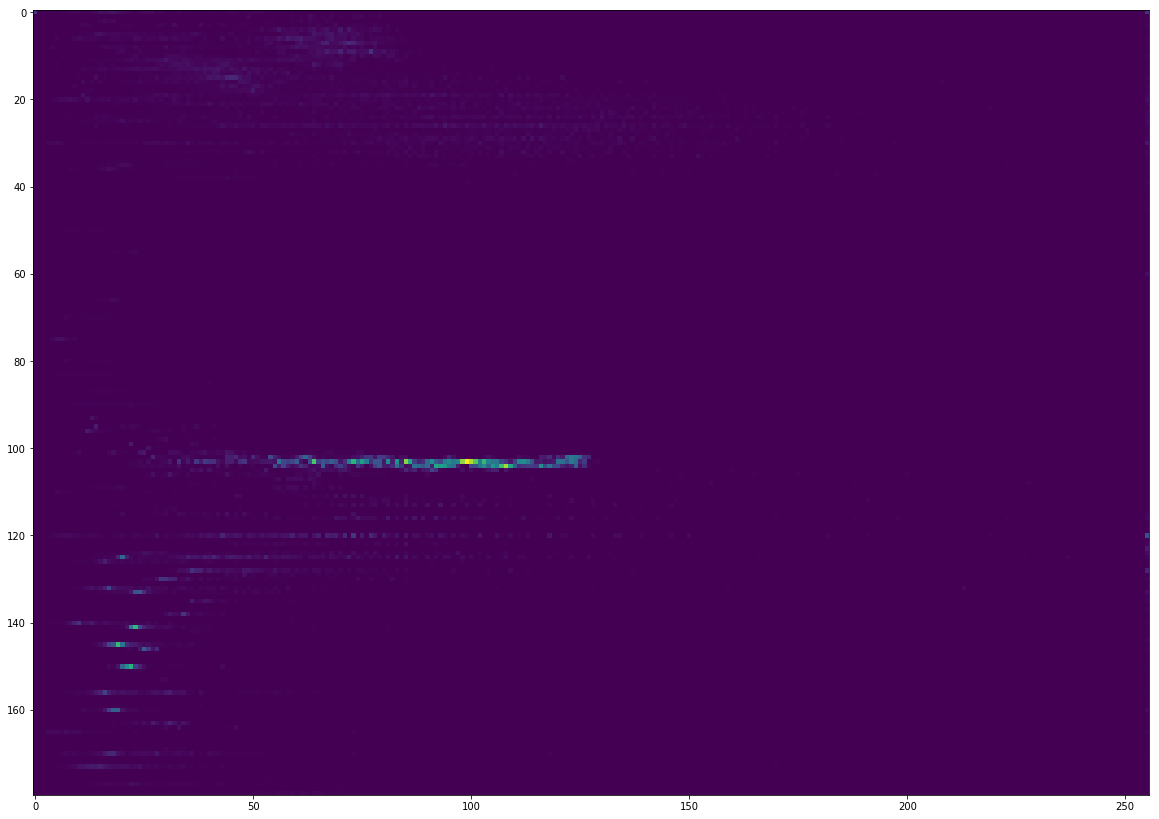

In [39]:
hsv = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(hsv)
plt.figure(figsize=(20,20))
hist = cv2.calcHist([hsv], [0, 1], None, [180, 256], [0, 180, 0, 256])
plt.imshow(hist,interpolation = 'nearest')
plt.show()

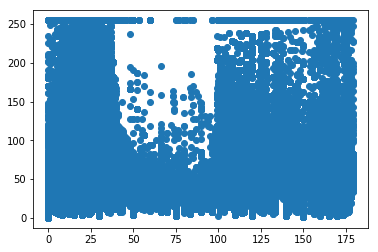

In [41]:
plt.scatter(h.flatten(), s.flatten())